# Estadística para Data Science: Cuaderno clase 4



In [3]:
# Importando librerías

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.stats as stats
import seaborn as sns


# Introducción a Diseño Experimental

## Recordando correlaciones y Relación entre variables: asociadas o independientes

Muchos análisis están motivados por un investigador buscando una relación entre dos o más variables. Volvamos a cargar el dataset `loan50`.

In [2]:
# Volvamos al dataset loan50

loan50 = pd.read_csv('https://raw.githubusercontent.com/vmlandae/datasets_eds/main/clase2/loan50.csv')

#  ¿que variables hay?

loan50.head(2)

,state,emp_length,term,homeownership,annual_income,verified_income,debt_to_income,total_credit_limit,total_credit_utilized,num_cc_carrying_balance,loan_purpose,loan_amount,grade,interest_rate,public_record_bankrupt,loan_status,has_second_income,total_income
0,NJ,3.0,60,rent,59000,Not Verified,0.557525,95131,32894,8,debt_consolidation,22000,B,10.90,0,Current,False,59000
1,CA,10.0,36,rent,60000,Not Verified,1.305683,51929,78341,2,credit_card,6000,B,9.92,1,Current,False,60000


In [3]:
# carguemos también el dataset de las encuestas del curso:


encuesta = pd.read_csv("https://raw.githubusercontent.com/vmlandae/datasets_eds/main/clase3/encuestas.csv")

codebook = pd.read_csv("https://raw.githubusercontent.com/vmlandae/datasets_eds/main/clase3/codebook.csv")

encuesta.head(2)

,Unnamed: 0,altura,region,sexo,gaseosa,te,cafe,agua,extrema_pobreza,acoso_sexual,perez,larrain,tu_apellido
0,0,182,"Zona Sur (Araucanía, Los Ríos, Los Lagos, Ayse...",Hombre,50,500,200,500,menos del 1%,cerca del 30%,500000.0,1000.0,10.0
1,1,175,"Zona Centro-Sur (Regiones de O'Higgins, Maule,...",Hombre,0,1300,0,0,menos del 1%,cerca del 30%,100000.0,100000.0,50000.0


Algunos ejemplos de preguntas en relación a los datasets que hemos visto previamente, que podríamos querer responder son:

(1)¿Cuál es la relación entre el ingreso total (`total_income`) y el monto del préstamo (`loan_amount`)? 

(2) Si el ingreso (`annual_income`) de alguien está por encima del promedio, ¿su tasa de interés (`interest_rate`) tenderá a estar por encima o por debajo del promedio?

(3) ¿Qué tan útil como predictor es el consumo de té para el consumo de agua en los estudiantes del curso?


Examinar estadística descriptiva podría proporcionarnos información para cada una de las tres preguntas. Además, los gráficos se pueden utilizar para explorar datos visualmente. Los diagramas de dispersión (scatterplots) son un tipo de gráfico que se utiliza para estudiar la relación entre dos variables numéricas.

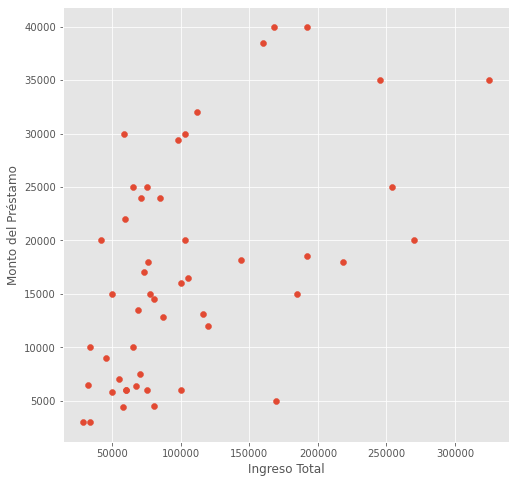

In [4]:
# plt.style.use es para cambiar el estilo del gráfico, 
# se puede ver una referencia acá: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('ggplot') # ggplot es un paquete de gráficos muy popular en R.

# acá podemos variar el tamaño de la figura: (ancho,alto) 
plt.rcParams['figure.figsize'] = (8,8)

# Hagamos un gráfico de dispersión entre 
# 1) loan_amount y total_income

# Crear scatterplot
fig = plt.scatter( loan50['total_income'], loan50['loan_amount'])

# Añadir labels
plt.ylabel('Monto del Préstamo')
plt.xlabel('Ingreso Total')
plt.show()


In [5]:
# 2) annual_income e interest_rate



In [6]:
# 3) Consumo de te y consumo de agua



El primer scatterplot (1) sugiere una relación entre las dos variables: los individuos con un ingreso total más alto tienden a tener montos de préstamos más altos. Podríamos hacer una lluvia de ideas sobre el por qué existe esta relación e investigar cada una para ver cuáles son las explicaciones más razonables. 
Se puede decir que ingreso total y monto del préstamo están asociados porque el gráfico nos muestra un patrón discernible. Como recordamos, una correlación es una medida de asociación entre dos variables, que puede ser positiva, cero o no existente y negativa, y donde no existe jerarquía a priori entre las variables, es decir: $corr(X,Y)=corr(Y,X)$. Mencionamos la clase pasada variables predictoras y variables de respuesta, hoy vamos a profundizar en ellas.



## Variables predictoras y variables de respuesta: El "rol" de las variables

Al hacer investigación normalmente se terminan midiendo o capturando muchas variables diversas. Luego, al analizar nuestros datos, usualmente se trata de explicar alguna(s) de las variable(s) en términos de algunas de las otras variables. Es importante separar estos roles, entre "las variables que explican" y las "explicadas, en categorías distintas. En términos de simbología matemática usualmente la variable "a ser explicada" se denota con la letra $Y$ y las variables que "hacen la explicación" son denotadas con $X_1$,$X_2$, etc.

Los nombres clásicos para estos roles son **variable(s) independiente(s)** (VI) y **variable dependiente** (VD).La VI es la variable que se usa para hacer la explicación(i.e., $X$) y la VD es la variable que está siendo explicada (i.e., $Y$). La lógica detrás de estos nombres es la siguiente: Si realmente hay una relación entre  $X$ e $Y$ entonces podemos decir que $Y$ depende de $X$, y si hemos diseñado nuestro estudio de manera "apropiada", entonces $X$ no es dependiente con nada más. Sin embargo, ya en muchas partes esta notación no agrada mucho ya que es difícil de recordar y muy engañoso, porque 
(a) Las VI nunca son realmente "independientes de todo lo demás" y 
(b) si no hay relación, entonces la VD en realidad no depende de la(s) VI. 

Hay varias alternativas, además de VI y VD, como variables explicativas y explicadas, o variables predictoras y de respuesta. 

|rol de la variable |Nombre clásico            |Nombre moderno |
|:--------------------|:-------------------------|:-----------|
|Ser explicado      |Variable Dependiente (VD)   |outcomes (respuestas)    |
|hacer la explicación|Variable Independiente (VI) |predictores   |

En muchos casos también, aparece directamente la pregunta de la **causalidad**: Queremos determinar si el cambio en una variable causa un cambio en la otra. Volviendo al ejemplo (1), un refraseo de la pregunta sería: si es que hay un incremento en el ingreso total de un individuo, ¿llevaría esto a un incremento en el monto del préstamo? Es decir, estamos preguntándonos si una variable afecta causalmente a la otra. Cuando tenemos esa sospecha, etiquetamos a la primera como **variable predictora o explicativa**, y a la segunda como **variable de respuesta, variable explicada o responsiva**. Pero tengamos en cuenta que para muchos pares de variables, no hay a priori una relación hipotética, y que el acto de etiquetar a las variables de esta forma no garantiza una relación causal en lo absoluto. Una evaluación formal para chequear si una variable causa un cambio en otra requiere de un **experimento**.


##  Investigación experimental y no experimental

Una gran distinción que tenemos que tener clara. Acá estamos hablando sobre el grado de control que el investigador ejerce sobre los sujetos y eventos en un estudio.

### Investigación experimental

Las características claves de la investigación experimental es que el investigador controla todos los aspectos del estudio, especialmente la experiencia de los sujetos durante el estudio. En particular, el investigador manipula o varía la(s) variable(s) predictora(s), y luego permite que la variable de respuesta varíe naturalmente. La idea acá es hacer variación en los predictores para ver si tiene algún efecto causal en los resultados. Más aún, para asegurar que no hay posibilidad que alguna otra cosa que la variable explicativa esté causando los outcomes, todo lo demás se mantiene constante o de alguna u otra manera se "balancea" para asegurar que no tengan efecto en los resultados. En la práctica, es casi imposible *pensar* en todo lo que puede tener una influencia en el outcome de un experimento, y mucho menos mantenerlo constante. La solución estándar para esto es la **aleatorización (randomization)**: esto es, que asignemos aleatoriamente sujetos a distintos grupos, y luego le demos un **tratamiento** distinto a cada grupo (i.e., asignarles distintos valores de la variable predictora). Vamos a hablar más de la aleatorización después, pero por ahora diremos que lo que la aleatorización hace es minimizar (pero no eliminar) las posibilidades que haya alguna diferencia sistemática entre los grupos. 


Consideremos un ejemplo simple, completamente irreal y muy poco ético. Supongamos que queremos comprobar si fumar causa cáncer de pulmón. Una forma de hacerlo sería encontrar personas que fuman y personas que no fuman, y ver si los fumadores tienen una tasa más alta de cáncer de pulmón. Esto *no es* un experimento adecuado, ya que no tendríamos mucho control sobre quién es y quién no es fumador. Y esto es realmente importante: por ejemplo, podría ser que las personas que eligen fumar también tiendan a tener una alimentación deficiente, o tal vez tiendan a trabajar más en minas de asbesto, etcétera. El punto es que los grupos (fumadores y no fumadores) en realidad difieren en muchas cosas, no *solo* en fumar. Entonces, podría ser que la mayor incidencia de cáncer de pulmón entre los fumadores se deba a otra cosa, no al cigarro per se. En términos técnicos, estas otras cosas (por ejemplo, la dieta) se denominan "factores de confusión" (*confounding factors*).

¿Cómo sería un experimento "adecuado"? Si nos echamos la ética al bolsillo, para salvar el problema de la diferencia entre los fumandores y no fumadores sería **controlar** quién fuma y quién no. Específicamente, si dividimos aleatoriamente a los participantes en dos grupos y forzamos a la mitad de ellos fumar y al otro a no fumar, entonces es muy poco probable que los grupos difieran en cualquier aspecto que no sea el hecho de que la mitad fuma. Así, si nuestro grupo de fumadores contrae cáncer a una tasa más alta que el grupo de no fumadores, entonces podemos sentirnos bastante seguros de que (a) fumar sí causa cáncer y (b) no tenemos ningún escrúpulo.

### Investigación no experimental

**_Investigación no experimental_** es un término amplio que abarca "cualquier estudio en el que el investigador no tiene tanto control como en un experimento". Hay muchas otras situaciones donde no se puede o no se debe tratar de obtener control. Por ejemplo, pensando en el mismo ejemplo anterior, en principio el "experimento ideal" sería tomar una población de no fumadores y hacerlos fumar. Supongamos que el cáncer de pulmón en los fumadores solo se produce cuando las personas comen mal, y que usualmente los fumadores "naturales" tienden a tener una mala dieta. Si tomo a una muestra de no fumadores y la obligo a fumar, esta muestra al menos en principio no adopta el resto de las características de los fumadores, por lo tanto posiblemente tengan una mejor dieta, y en este hipotético ejemplo no tendrían cáncer de pulmón y nuestro experimento falla porque viola la estructura del mundo "natural" (el nombre técnico para esto sería un "artefacto").

Una distinción que vale la pena hacer entre dos tipos de investigación no experimental es la diferencia entre ***investigación cuasiexperimental*** y ***estudios de casos***. El ejemplo que discutí anteriormente, en el que queríamos examinar la incidencia de cáncer de pulmón entre fumadores y no fumadores, sin tratar de controlar quién fuma y quién no, es un diseño cuasi-experimental. Es decir, es lo mismo que un experimento, pero no tenemos controlamos los predictores (IV). Todavía podemos usar estadísticas para analizar los resultados, solo que tenemos que ser mucho más cuidadosos.

El enfoque alternativo, los estudios de casos, tiene como objetivo proporcionar una descripción muy detallada de uno o unos pocos casos. Si bien no puedo usar mucha estadística y no puedo sacar conclusiones de la evidencia anecdótica, los estudios de casos son muy útiles en algunas situaciones. En algunas ocasiones no hay alternativa: En neurociencia, por ejemplo, pasa mucho. A veces, simplemente no hay muchas personas con un daño cerebral de un área específica, por lo que lo único que puede hacer es describir los casos que tiene con el mayor detalle y cuidado posible.







# (Breve) Introducción a Probabilidades


Hasta ahora, hemos discutido algunas ideas claves en diseño experimental y hemos visto como se puede describir, resumir y visualizar un dataset. Para mucha gente, esto es todo lo que hay que ver en estadística: se trata de calcular promedios, dibujar gráficos y ponerlos en algún reporte. Sin embargo, la estadística descriptiva es solo una pequeña parte de la estadística, y la parte más grande y en muchos casos más útil es la que nos provee las herramientas que nos permiten hacer *inferencia* sobre los datos, en los (muchísimos) casos donde no tenemos acceso a datos censales sino muestrales. La **inferencia estadística** está construida en los cimientos de la **teoría probabilística**, por lo cual haremos una breve revisión cubriendo parte de lo básico 

## ¿Cómo son distintas las probabilidades y la estadística?

Antes de hablar sobre teoría de probabilidades, es útil pensar en la relación entre probabilidad y estadística. Las dos disciplinas están estrechamente relacionadas pero no son lo mismo. La teoría de probabilidades es "la doctrina de las posibilidades". Es una rama de la matemática que nos dice cuán frecuentemente sucederán diferentes tipos de eventos. Por ejemplo, todas estas preguntas podemos responderlas usando probabilidades:

- ¿Que posibilidad hay que al lanzar una "moneda justa" salgan 10 caras seguidas.
- Si lanzo dos dados de seis caras, ¿cuán probable es que saque dos seis?
- ¿Qué tan probable es que en cinco cartas sacadas de un mazo barajado todas sean corazones?
- ¿Qué probabilidad tengo de sacarme el loto?

Todas estas preguntas tienen algo en común. En cada caso, "la verdad del funcionamiento del mundo" es conocida, y la pregunta pasa por el "tipo de eventos" que sucederán. El punto crítico es que las preguntas probabilísticas parten con un **modelo** conocido del mundo, y usamos ese modelo para hacer cálculos. Este modelo subyacente puede ser muy simple. Por ejemplo, en la primera pregunta, podríamos escribir el modelo de esta forma:

$$
P(\mbox{cara}) = 0.5
$$
Que se puede leer como "la probabilidad de que salga cara es de 0.5". Como veremos, las probabilidades son números que van desde el 0 al 1. Al usar este modelo para responder la primera pregunta, no estoy respondiendo y no sé realmente qué es lo que va a pasar si lanzo una moneda justa diez veces. A lo mejor salen 10 caras, a lo mejor salen 3 o a lo mejor ninguna. Esa es la clave: En teoría de probabilidades, el **modelo** es conocido, pero los **datos** no. 

Eso es probabilidad. ¿Qué pasa con estadística? Las preguntas estadísticas van para el otro lado. En estadística, **no sabemos** "la verdad sobre el mundo". Lo único que tenemos son datos y es desde los datos que queremos **aprender** "la verdad sobre el mundo". Las preguntas estadísticas podrían ser de esta forma:

- Si un amigo lanza una moneda 10 veces y saca 10 caras, ¿me está haciendo leso?
- Si las primeras cinco cartas del mazo son todas corazones, que tan probable es que el mazo haya sido barajado?
- Si el ["presidente" de Zimbawe se gana la lotería](http://news.bbc.co.uk/1/hi/world/africa/621895.stm), que tan probable es que haya sido arreglado?

Ahora lo único que tenemos son datos. Lo que **sé** es que vi a mi amigo tirar la moneda 10 veces y salió cara todo el tiempo. Y lo que quiero **inferir** es si puedo concluir que lo que vi fueron 10 lanzamientos de una moneda justa o si puedo sospechar que pasa algo distinto. Los datos se verían así:
```
C C C C C C C C C C
```
Y lo que estoy tratando de hacer es ver a cual "modelo del mundo" debería ponerle mi confianza. Si la moneda es justa, entonces el modelo que debería adoptar es el de $P(\mbox{cara}) = 0.5$. Si la moneda no es justa, entonces el modelo sería $P(\mbox{heads}) \neq 0.5$. En otras palabras, el problema de inferencia sería averiguar cuál de estos modelos es el correcto. Claramente, la pregunta estadística no es la misma que la probabilística, pero están profundamente conectadas entre sí. 


### La perspectiva frecuentista

El primero de los dos enfoques principales a la probabilidad, y el más usado en la literatura estadística es el enfoque frecuentista, que define la probabilidad como una **frecuencia de largo plazo**. Supongamos que estamos tirando una moneda justa una y otra vez (llamaremos desde ahora H a "heads"(cara) y T a "tails"(sello). Por definición, la moneda tiene una $P(H) = 0.5$. ¿Qué podríamos observar? Una posible distribución es la siguiente

```
T,H,H,H,H,T,T,H,H,H,H,T,H,H,T,T,T,T,T,H
```
En este caso, 11 de esas 20 monedas tiradas (55\%) salieron cara. Ahora supongamos que fui manteniendo un score de la cantidad de caras acumulada ($N_H$) que he ido observando a través de los primeros $N$ tiros, y calculo la proporción de caras $N_H / N$  cada vez. Tendríamos lo siguiente:

In [11]:
number_of_flips = [1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10, 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 , 19 , 20]
number_of_heads = [0 , 1 , 2 , 3 , 4 , 4 , 4 , 5 , 6 , 7,  8  ,  8 ,  9 , 10 , 10 , 10 , 10 , 10 , 10 , 11] 
proportion = [.00 , .50 , .67 , .75 , .80 , .67 , .57 , .63 , .67 , .70, .73 , .67 , .69 , .71 , .67 ,  .63 , .59 , .56 , .53 , .55]

df = pd.DataFrame(
    {'Numero de tiros': number_of_flips,
     'Numero de caras': number_of_heads,
     'Proporcion': proportion
    })

df

,Numero de tiros,Numero de caras,Proporcion
0,1,0,0.00
1,2,1,0.50
2,3,2,0.67
3,4,3,0.75
4,5,4,0.80
5,6,4,0.67
6,7,4,0.57
7,8,5,0.63
8,9,6,0.67
9,10,7,0.70


In [ ]:
# Hagámoslo de nuevo, ahora tirando la moneda 20 veces y guardando el resultado en una variable

number_of_flips = [1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10, 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 , 19 , 20]
number_of_heads = [] 
proportion = 

df = pd.DataFrame(
    {'Numero de tiros': number_of_flips,
     'Numero de caras': number_of_heads,
     'Proporcion': proportion
    })

df

Observe que al comienzo de la secuencia, la *proporción* de caras fluctúa enormemente, comenzando en .00 y subiendo hasta .80. Más tarde, uno tiene la impresión de que se amortigua un poco, con más y más valores que en realidad están bastante cerca de la respuesta "correcta" de 0.5. Esta es la definición frecuentista de probabilidad en pocas palabras: lanzar una moneda justa una y otra vez, y a medida que $N$ crece (se acerca al infinito, denotado $N\rightarrow \infty$), la proporción de caras convergerá a un 50\ % Existe una definición matemática formal más sofisticada, pero cualitativamente hablando, así es como los frecuentistas definen la probabilidad. 

No tenemos ni un número infinito de monedas ni la paciencia y tiempo para lanzar una moneda infinitas veces, sin embargo, un computador es una máquina que es muy buena haciendo tareas repetitivas.

Vamos a crear una función que simule lanzar una moneda.



In [12]:
import random
import numpy as np
import seaborn as sns



def coin_flips(n):
    n = n
    heads = [random.uniform(0,1) for i in range(n)]
    heads = [1 if i > 0.5 else 0 for i in heads]
    flips = np.arange(1,n+1)
    proportion = (np.cumsum(heads)/flips)

    df = pd.DataFrame(
        {'flips': flips,
         'proportion_heads': proportion
        })

    #ax = sns. lineplot(x=df['flips'], y=df['proportion_heads'])
    return(df)

In [13]:
# Probando la función:

print(coin_flips(1))

print(coin_flips(20))

   flips  proportion_heads
0      1               0.0
    flips  proportion_heads
0       1          1.000000
1       2          0.500000
2       3          0.333333
3       4          0.500000
4       5          0.400000
5       6          0.333333
6       7          0.428571
7       8          0.375000
8       9          0.333333
9      10          0.400000
10     11          0.454545
11     12          0.416667
12     13          0.461538
13     14          0.428571
14     15          0.466667
15     16          0.437500
16     17          0.470588
17     18          0.444444
18     19          0.473684
19     20          0.500000


Hagamos algunas simulaciones más grandes. Lancemos la moneda 1000 veces y veamos los últimos valores

In [17]:
n = 1000

run1 = coin_flips(n)

run1.tail()


,flips,proportion_heads
995,996,0.521084
996,997,0.520562
997,998,0.520040
998,999,0.520521
999,1000,0.521000


Lancemos la moneda 1000 veces de nuevo, y de nuevo y de nuevo. 


In [ ]:
run2 = coin_flips(n)
run3 = coin_flips(n)
run4 = coin_flips(n)

Ahora vamos a **concatenar** los dataframes, y vamos a agregar una columna que indique a cual de los 4 runs corresponden los datos:

In [6]:
df = pd.concat([run1, run2, run3, run4], axis=0,ignore_index=True)

runs = ['run1']*n + ['run2']*n + ['run3']*n + ['run4']*1000

df['runs'] = runs

Hagamos un lineplot (con seaborn) para ver como va convergiendo al valor esperado.

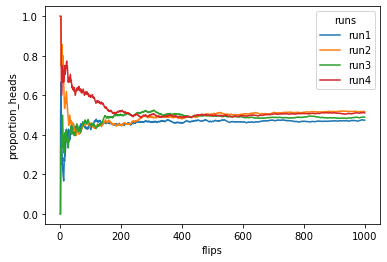

In [7]:
ax = sns.lineplot(data = df, x = 'flips', y = 'proportion_heads', hue = 'runs')

 
## Teoría probabilistica básica


### Introduciendo distribuciones de probabilidad





## Distribuciones Notables
Hay muchos tipos diversos de distribuciones de probabilidad.  Sin embargo, no todas son igualmente importantes. Hoy veremos dos: la distribución binomial y la distribución normal, y en las próximas clases veremos la distribución $t$, la distribución $\chi^2$ ("chi-cuadrado") y la distribución $F$. 

### Distribucion Binomial

Imaginemos un experimento simple, donde tengo 20 dados idénticos que tienen una cara con una foto de una calavera (skull) y las otras caras en blanco. Si tiro todos los dados al mismo tiempo, cual es la probabilidad de sacar exactamente 4 skulls? 
Asumiendo que los dados son justos, sabemos que la probabilidad de que salga skull es de 1 en 6, o sea, aproximadamente $0.167$. Con esto puedo responder nuestra pregunta, veamos como se hace:

Vamos a introducir algunos nombres y notación. $N$ denota el número de lanzamientos de dados en nuestro experimento; que a menudo se denomina **_parámetro de tamaño_** de nuestra distribución binomial. También usaremos $\theta$ para referirnos a la probabilidad de que un solo dado salga skull, una cantidad que generalmente se llama **_probabilidad de éxito_** del binomio. Finalmente, usaremos $X$ para referirnos a los resultados de nuestro experimento, es decir, la cantidad de calaveras que obtengo cuando tiro los dados. Dado que el valor real de $X$ se debe al azar, nos referimos a él como una **_variable aleatoria_**. La cantidad que queremos calcular es la probabilidad de que $X = 4$ dado que sabemos que $\theta = .167$ y $N=20$. La "forma" general de lo que me interesa calcular podría escribirse como

$$
P(X \ | \ \theta, N)
$$
y estamos interesados en el caso especial donde $X=4$, $\theta = .167$ y $N=20$.

Solo hay una notación más a la que quiero referirme antes de pasar a discutir la solución al problema. Si quiero decir que $X$ se genera aleatoriamente a partir de una distribución binomial con parámetros $\theta$ y $N$, la notación que usaría es la siguiente:

$$
X \sim \mbox{Binomial}(\theta, N)
$$ 

Veamos como se ve la distribución binomial. El siguiente histograma grafica las probabilidades binomiales para todos los valores posibles de  $X$ desde $X=0$ (cero skulls) hasta $X=20$ (todas skulls).En el eje horizontal tenemos todos los eventos posibles y en el eje vertical podemos ver la probabilidad de cada uno de estos eventos. Entonces, la probabilidad de sacar 4 skulls de 20 dados es de aproximadamente 0,20 (la respuesta real es 0,2022036, como veremos en un momento). En otras palabras, esperaría que eso sucediera alrededor del 20\% de las veces que se repitió este experimento.

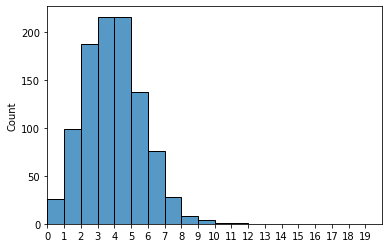

In [10]:

x = np.random.binomial(n=20, p=1/6, size=1000)

# Ve que pasa si aumentas el tamaño
#x = np.random.binomial(n=20, p=1/6, size=10000000)

skulls = sns.histplot(x, bins=20,binwidth=1)
skulls.set(xlim=(0,20))
plt.xticks(np.arange(min(x), 20, 1.0))
plt.show()


Las fórmulas para las distribuciones binomial y normal son las siguientes. No las vamos a ocupar en el curso, pero como referencia las dejamos acá.


Distibución Binomial

$$
P(X | \theta, N) = \frac{N!}{X! (N-X)!}  \theta^X (1-\theta)^{N-X}
$$ 



Distribución Normal

$$
p(X | \mu, \sigma) = \frac{1}{\sqrt{2\pi}\sigma} \exp \left( -\frac{(X - \mu)^2}{2\sigma^2} \right)
$$

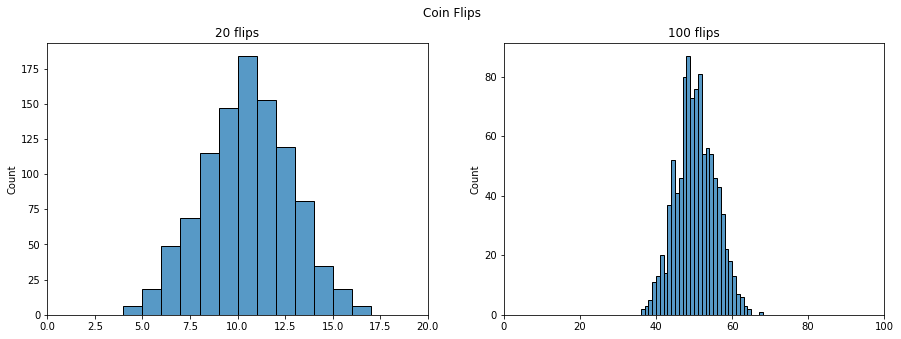

In [9]:

from numpy import random

x_20 = random.binomial(n=20, p=1/2, size=1000)
x_100 = random.binomial(n=100, p=1/2, size=1000)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Coin Flips')


# 20 flips
sns.histplot(x_20, bins=20,binwidth=1,ax=axes[0])
axes[0].set_title('20 flips')
axes[0].set(xlim=(0,20))


# 100 flips
sns.histplot(x_100, bins=20,binwidth=1, ax=axes[1])
axes[1].set_title('100 flips')
axes[1].set(xlim=(0,100))
plt.show()


## La Distribución Normal

También llamada distribución Gaussiana o Campana de Gauss, una distribución normal se describe usando dos parámetros: El promedio de la distribución $\mu$ y la desviación estándar $\sigma$. La notación habitual es

$$
X \sim \mbox{Normal}(\mu,\sigma)
$$

Hagámonos una idea de lo que significa que una variable se distribuya normalmente. Veamos la siguiente figura, que traza una distribución normal con media $\mu = 0$ y desviación estándar $\sigma = 1$. Ten en cuenta que, a diferencia de los gráficos para la distribución binomial, la imagen de la distribución normal muestra una curva suave en lugar de barras "similares a histogramas". Esta no es una elección arbitraria: la distribución normal es continua, mientras que la binomial es discreta. Por ejemplo, en el ejemplo de lanzamiento de dados de la última sección, era posible obtener 3 skulls o 4 skulls, pero era imposible obtener 3,9 skulls. Las cantidades continuas no tienen esta restricción. 

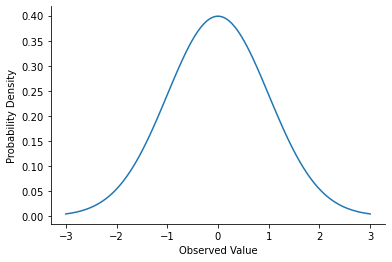

In [18]:
%matplotlib inline



mu = 0
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
fig = sns.lineplot(x = x, y = stats.norm.pdf(x, mu, sigma))
plt.xlabel('Observed Value')
plt.ylabel('Probability Density')

sns.despine()


In [ ]:
%matplotlib inline

import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns


mu = 0
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(1, 10, 100)
y1 = stats.norm.pdf(x, 4, sigma)
y2 = stats.norm.pdf(x, 7, sigma)


fig = sns.lineplot(x = x, y = y1)
ax2=fig.twinx()
ax2.tick_params(left=False, labelleft=False, top=False, labeltop=False,
                   right=False, labelright=False, bottom=False, labelbottom=False)



sns.lineplot(x = x, y = y2, ax=ax2, linestyle='--')
sns.despine()



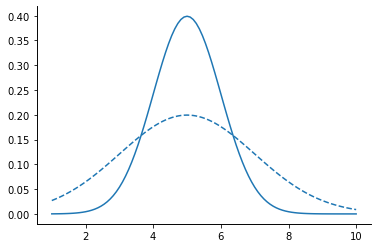

In [19]:
%matplotlib inline

import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns


mu = 5

variance = 1
sigma = np.sqrt(variance)
x = np.linspace(1, 10, 100)
y1 = stats.norm.pdf(x, mu, 1)

variance = 2
sigma = np.sqrt(variance)
y2 = stats.norm.pdf(x, mu, 2)


fig = sns.lineplot(x = x, y = y1)

ax2=fig.twiny()
ax2.tick_params(left=False, labelleft=False, top=False, labeltop=False,
                   right=False, labelright=False, bottom=False, labelbottom=False)



sns.lineplot(x = x, y = y2, ax=ax2, linestyle='--')
sns.despine()



Una característica importante de la distribución normal: Independientemente de cuál sea la media real y la desviación estándar, el 68,3 % del área se encuentra dentro de 1 desviación estándar de la media. De manera similar, el 95,4 % de la distribución se encuentra dentro de las 2 desviaciones estándar de la media y el 99,7 % de la distribución se encuentra dentro de las 3 desviaciones estándar. 

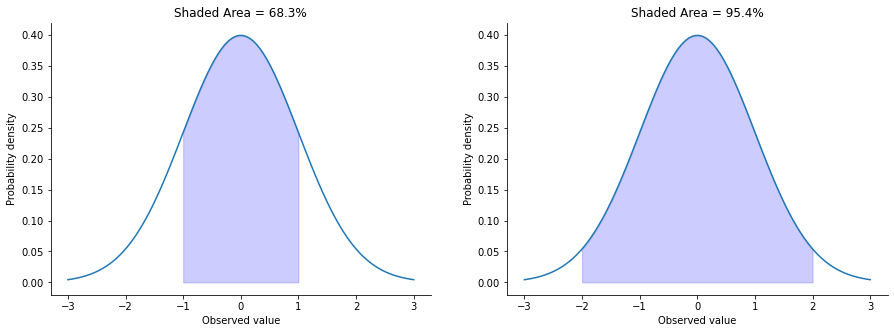

In [20]:
import numpy as np
import scipy.stats as stats
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)

mu = 0
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
sns.lineplot(x = x, y = stats.norm.pdf(x, mu, sigma), ax=axes[0])


sns.lineplot(x = x, y = stats.norm.pdf(x, mu, sigma), ax=axes[1])


x_fill1 = np.arange(-1, 1, 0.001)
x_fill2 = np.arange(-2, 2, 0.001)

y_fill1 = stats.norm.pdf(x_fill1,0,1)
y_fill2 = stats.norm.pdf(x_fill2,0,1)

axes[0].fill_between(x_fill1,y_fill1,0, alpha=0.2, color='blue')
axes[1].fill_between(x_fill2,y_fill2,0, alpha=0.2, color='blue')

axes[0].set_title("Shaded Area = 68.3%")
axes[1].set_title("Shaded Area = 95.4%")

axes[0].set(xlabel='Observed value', ylabel='Probability density')
axes[1].set(xlabel='Observed value', ylabel='Probability density')

sns.despine()



In [ ]:

import numpy as np
import scipy.stats as stats
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)

mu = 0
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
sns.lineplot(x = x, y = stats.norm.pdf(x, mu, sigma), ax=axes[0])


sns.lineplot(x = x, y = stats.norm.pdf(x, mu, sigma), ax=axes[1])


x_fill1 = np.arange(-4, -1, 0.001)
x_fill2 = np.arange(-1, 0, 0.001)

y_fill1 = stats.norm.pdf(x_fill1,0,1)
y_fill2 = stats.norm.pdf(x_fill2,0,1)

axes[0].fill_between(x_fill1,y_fill1,0, alpha=0.2, color='blue')
axes[1].fill_between(x_fill2,y_fill2,0, alpha=0.2, color='blue')

axes[0].set_title("Shaded Area = 15.9%")
axes[1].set_title("Shaded Area = 34.1%")

axes[0].set(xlabel='Observed value', ylabel='Probability density')
axes[1].set(xlabel='Observed value', ylabel='Probability density')

sns.despine()
